In [1]:
# pip install opencv-python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
import cv2 # openCV
from glob import glob
import tensorflow as tf

In [3]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print("Shape of X Train: ",x_train.shape)
print("Shape of Y Train: ",y_train.shape)
print("Shape of X Test: ",x_test.shape)
print("Shape of Y Test: ",y_test.shape)

Shape of X Train:  (50000, 32, 32, 3)
Shape of Y Train:  (50000, 1)
Shape of X Test:  (10000, 32, 32, 3)
Shape of Y Test:  (10000, 1)


In [4]:
numberOfClass=10

In [5]:
y_train=to_categorical(y_train,numberOfClass)
y_test=to_categorical(y_test,numberOfClass)

In [6]:
input_shape=x_train.shape[1:]

# VISUALIZE

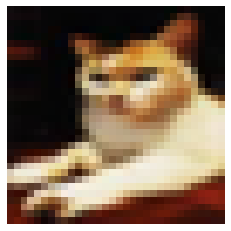

In [7]:
plt.imshow(x_train[1554].astype(np.uint8))
plt.axis("off");

In [8]:
# increase dimension
def resize_img(img):
    numberOfImage=img.shape[0]
    new_array=np.zeros((numberOfImage, 48,48,3))
    for i in range(numberOfImage):
        new_array[i]=cv2.resize(img[i,:,:,:],(48,48))
    return new_array

In [9]:
x_train=resize_img(x_train)
x_test=resize_img(x_test)
x_train.shape

(50000, 48, 48, 3)

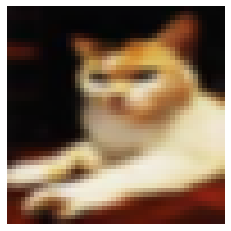

In [10]:
plt.figure()
plt.imshow(x_train[1554].astype(np.uint8))
plt.axis("off");

In [11]:
#VGG19

vgg=VGG19(include_top=False, weights="imagenet",input_shape=(48,48,3))
#weight ler imagenette eğitilmi olsun.
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [12]:
?VGG19

In [13]:
vgg_layer_list=vgg.layers
vgg_layer_list

In [14]:
model=Sequential()
for layer in vgg_layer_list:
    model.add(layer)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [15]:
for layer in model.layers:
    layer.trainable=False
# Fully connected layer dışındakileri Train etme!

In [16]:
# Add Fully Connected Layers
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(numberOfClass,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [17]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])
hist= model.fit(x_train,y_train,validation_split=0.2,epochs=3,batch_size=10)

Epoch 1/3
4000/4000 [==============================] - 531s 132ms/step - loss: 4.4164 - accuracy: 0.4916 - val_loss: 1.5545 - val_accuracy: 0.5167
Epoch 2/3
4000/4000 [==============================] - 527s 132ms/step - loss: 1.4977 - accuracy: 0.5351 - val_loss: 1.5370 - val_accuracy: 0.5137
Epoch 3/3
4000/4000 [==============================] - 586s 146ms/step - loss: 1.4624 - accuracy: 0.5455 - val_loss: 1.4726 - val_accuracy: 0.5311


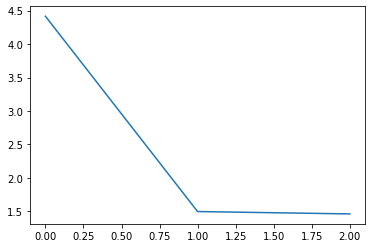

In [18]:
plt.plot(hist.history["loss"],label="Train Loss")

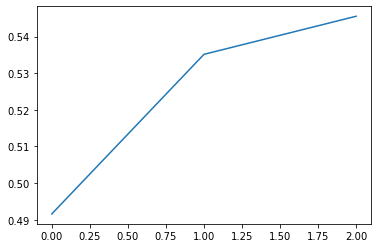

In [19]:
plt.plot(hist.history["accuracy"],label="Train Accuracy")

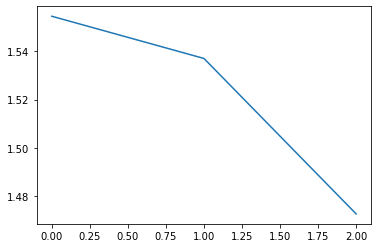

In [20]:
plt.plot(hist.history["val_loss"],label="Train val_loss")

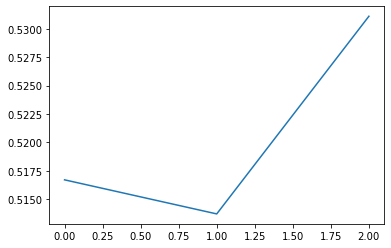

In [21]:
plt.plot(hist.history["val_accuracy"],label="Train val_accuracy")